# 선형회귀

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 단순선형회귀 모델 만들기

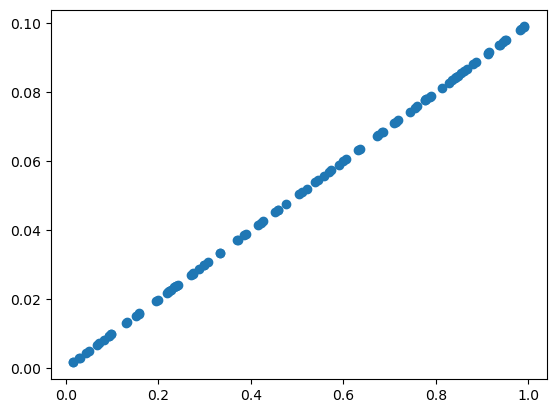

In [5]:
X = np.random.rand(100)
y = 0.2 * X * 0.5

plt.scatter(X,y)

In [6]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [7]:
# 경사하강법 y=wX+b, w결정
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learnig_rate = 0.5 # 임의 값

Epoch 0, w : -0.0043, Error : 0.7387


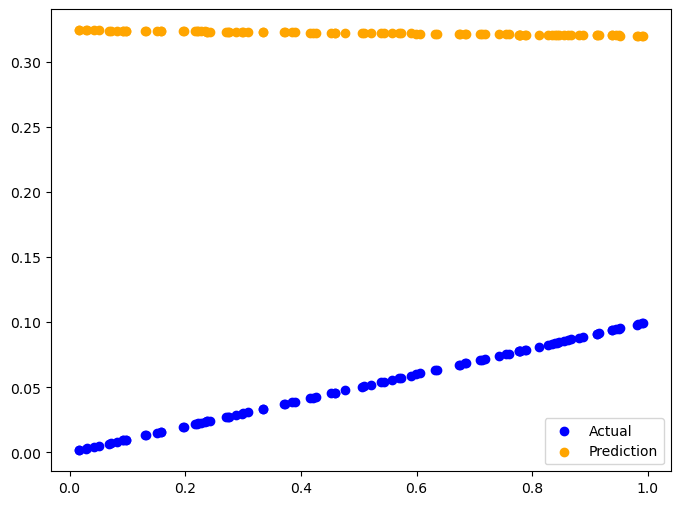

Epoch 10, w : -0.0506, Error : 0.0421


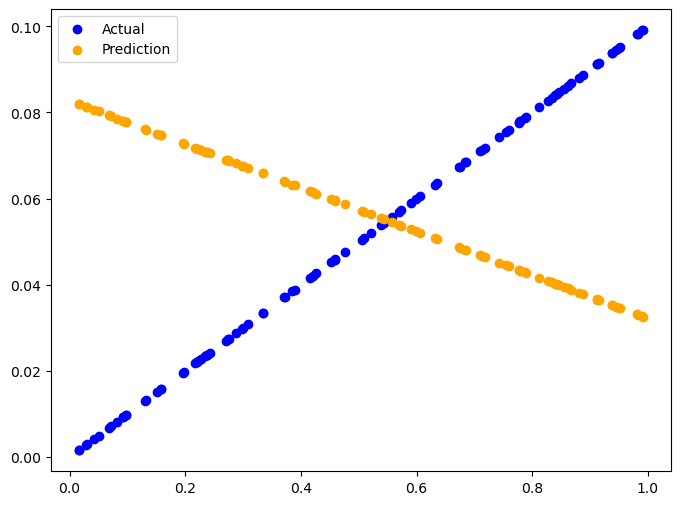

Epoch 20, w : -0.0045, Error : 0.0292


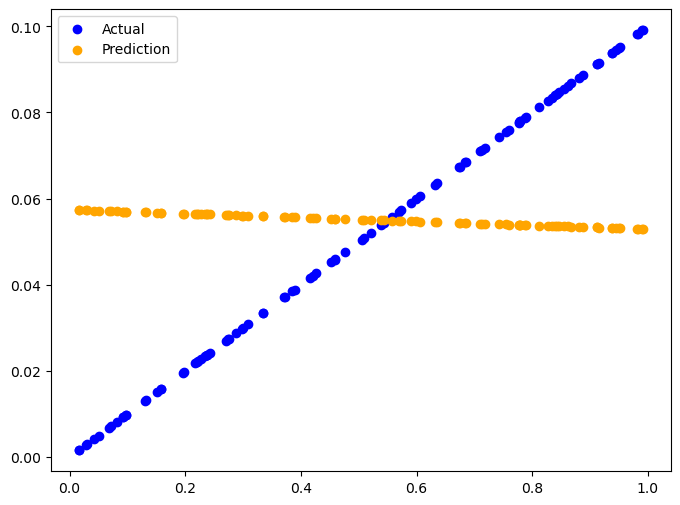

Epoch 30, w : 0.0275, Error : 0.0203


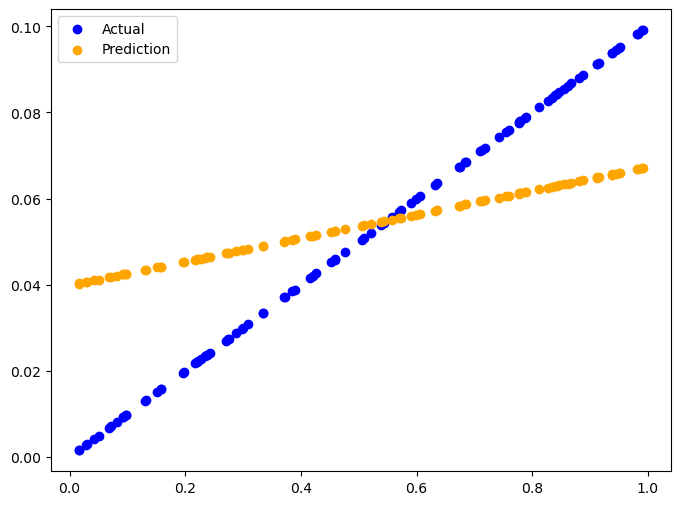

Epoch 40, w : 0.0497, Error : 0.0141


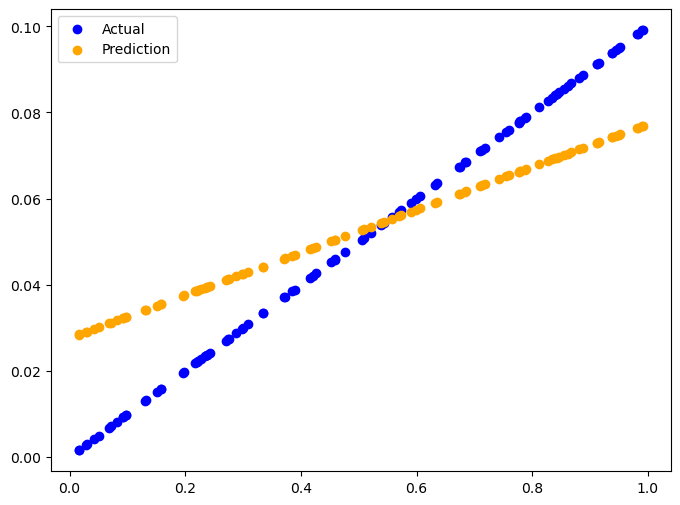

Epoch 50, w : 0.0651, Error : 0.0098


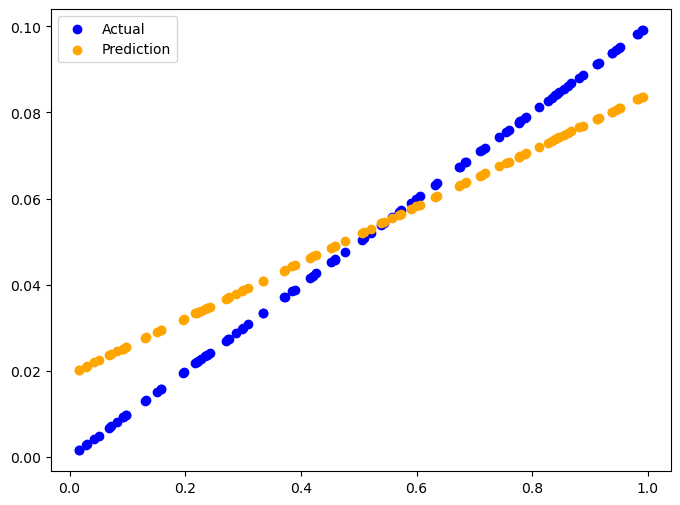

Epoch 60, w : 0.0758, Error : 0.0068


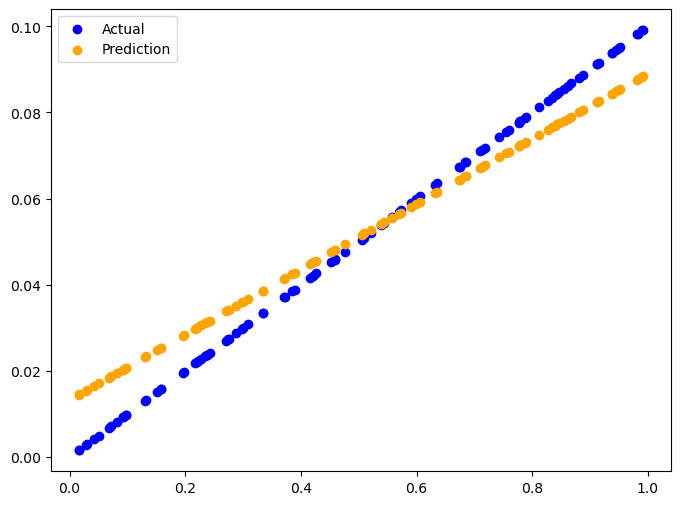

Epoch 70, w : 0.0832, Error : 0.0047


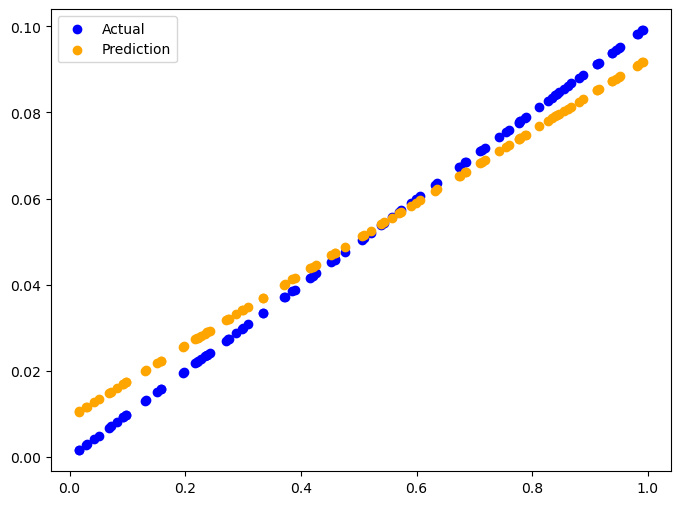

Epoch 80, w : 0.0883, Error : 0.0033


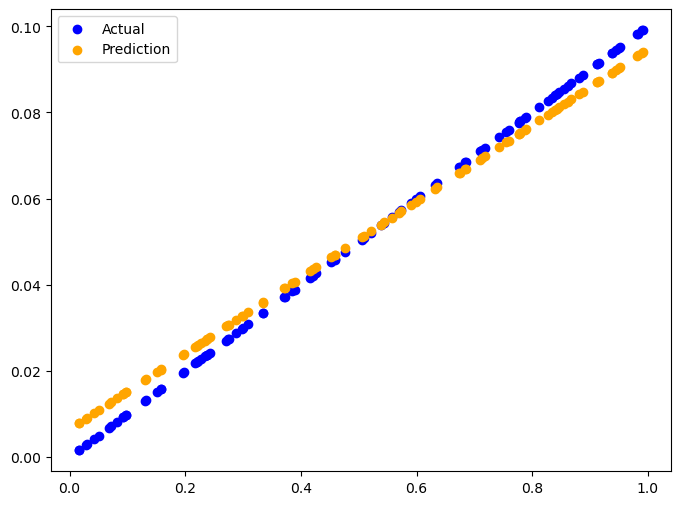

Epoch 90, w : 0.0919, Error : 0.0023


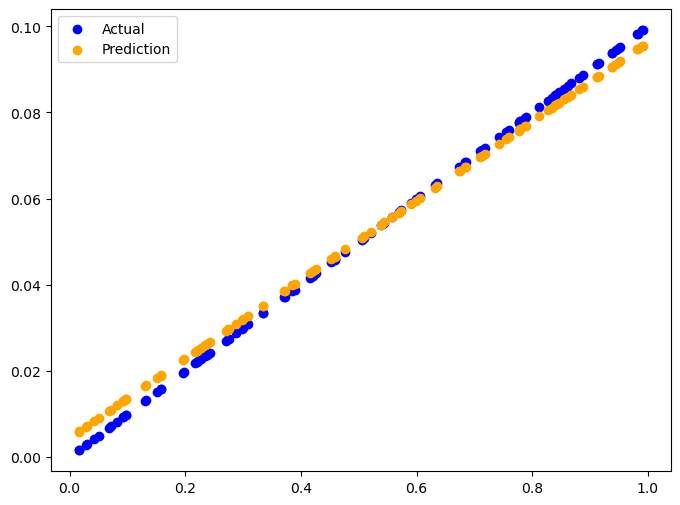

In [8]:
for epoch in range(100):
    y_pred = w * X + b
    error = np.abs(y_pred - y).mean()
    if error < 0.001 : 
        break
    w_descent = learnig_rate * ((y_pred - y)*X).mean()
    b_descent = learnig_rate * ((y_pred - y).mean())
    w = w - w_descent
    b = b - b_descent
    
    if epoch%10 == 0 :
        print(f'Epoch {epoch}, w : {w:.4f}, Error : {error:.4f}')
        y_pred = w*X+b
        plt_prediction(y_pred, y)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [10]:
bostonDf = pd.read_csv('./data/boston.csv')
bostonDf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [11]:
X = bostonDf.drop('target', axis=1).values
y = bostonDf['target'].values
bostonDf.shape

(506, 14)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [13]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [14]:
# 결정계수 
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [15]:
# 회귀식 
# w1, w0
lr.intercept_, lr.coef_

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = w0 + w1*X1 + w2*X2 + ... + w13*X13

In [16]:
np.round(lr.intercept_,1), np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [17]:
pd.Series(data = np.round(lr.coef_,1), index=bostonDf.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [18]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error')
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [19]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [20]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차는 작고(4.15 > 5.82), 결정계수는 작아진 결과

# 규제 회귀 모델

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [23]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

print("\n[릿지 회귀]")
print("MSE:", mean_squared_error(y_test, pred_ridge))
print("R2:", r2_score(y_test, pred_ridge))


[릿지 회귀]
MSE: 17.206833316177068
R2: 0.7584907011357223


In [37]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'"MSE:", {ridge_mse}')
print(f'"R2:", {ridge_r2}')

"MSE:", 17.29626010177991
"R2:", 0.7572355369870509


In [27]:
ridge_cv.alpha_

np.float64(0.001)

In [28]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("\n[라쏘 회귀]")
print("MSE:", mean_squared_error(y_test, pred_lasso))
print("R2:", r2_score(y_test, pred_lasso))


[라쏘 회귀]
MSE: 22.137098759778443
R2: 0.6892911611262599


In [29]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f'"MSE:", {lasso_mse}')
print(f'"R2:", {lasso_r2}')

"MSE:", 17.283108558822182
"R2:", 0.7574201276005788


In [30]:
lasso_cv.alpha_

np.float64(0.001)

In [31]:
lasso_cv.coef_

array([-1.12661593e-01,  6.56008407e-02,  3.30878096e-02,  3.02619848e+00,
       -1.94682482e+01,  3.35481221e+00,  5.71239360e-03, -1.73664047e+00,
        3.55109529e-01, -1.43215477e-02, -9.16008532e-01,  1.04167858e-02,
       -5.66946541e-01])

# 엘라스틱넷

In [40]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [45]:
enet_pred = enet.predict(X_test)
print('[엘라스틱넷 회귀]')
print("MSE:",mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))

[엘라스틱넷 회귀]
MSE: 18.11673827943616
R2: 0.7457195824951279


In [50]:
results = pd.DataFrame({

    '모델' : ['다항회귀', '릿지회귀', '라쏘회귀','엘라스틱넷회귀'],


    'MSE' : [mean_squared_error(y_test,y_pred),
             mean_squared_error(y_test,pred_ridge),
             mean_squared_error(y_test,pred_lasso),
             mean_squared_error(y_test,enet_pred)],


    'R2' : [r2_score(y_test,y_pred),
            r2_score(y_test,pred_ridge),
            r2_score(y_test,pred_lasso),
            r2_score(y_test, enet_pred)]
})
results

,모델,MSE,R2
0,다항회귀,17.296916,0.757226
1,릿지회귀,17.206833,0.758491
2,라쏘회귀,22.137099,0.689291
3,엘라스틱넷회귀,18.116738,0.745720
